In [1]:
pip install ultralytics


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Train the model with 2 GPUs
results = model.train(data="custom_data_yolo.yaml", epochs=20, imgsz=640 ,lr0 =0.01)

In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the YOLOv8n model
model = YOLO('C:/Users/harshika.pathak/Desktop/WORK/object_detection/runs/detect/train3/weights/best.pt')

# Load an image
image_path = r'C:\Users\harshika.pathak\Desktop\WORK\object_detection\inference_image\Image.jpg'
image = cv2.imread(image_path)

# Run inference

def infer_yolo_model(image_path):
			results = model(image_path)
			detection_data = []

			# Loop through the detections in the first result (assuming a single image)
			for box in results[0].boxes:
							# Extract bounding box coordinates, confidence, and label
							coordinates = box.xyxy.tolist()[0]  # Bounding box [x_min, y_min, x_max, y_max]
							confidence = box.conf.item()       # Confidence score
							label_index = int(box.cls.item())  # Class index
							label_name = results[0].names[label_index]  # Class name

							# Append the extracted data to the list
							detection_data.append({
											"coordinates": coordinates,
											"confidence": confidence,
											"label": label_name
							})
			print(detection_data)

			for detection in detection_data:
							if detection['confidence'] >= 0.60:
											# Get bounding box coordinates and label
											x_min, y_min, x_max, y_max = map(int, detection['coordinates'])
											confidence = detection['confidence']
											label = detection['label']

											# Draw bounding box
											cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 0, 0), 2)

											# Put label and confidence on the image
											label_text = f"{label} {confidence:.2f}"
											cv2.putText(image, label_text, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
			return image

In [6]:
import cv2

# Open the default camera
cam = cv2.VideoCapture(0)
model = YOLO('C:/Users/harshika.pathak/Desktop/WORK/object_detection/runs/detect/train3/weights/best.pt')

# Get the default frame width and height
frame_width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))

# # Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (frame_width, frame_height))
def infer_yolo_model(temp_image_path):
    # Run YOLO inference
    results = model(temp_image_path)
    image = cv2.imread(temp_image_path)
    detection_data = []

    # Loop through detections
    for box in results[0].boxes:
        # Extract bounding box coordinates, confidence, and label
        coordinates = box.xyxy.tolist()[0]  # Bounding box [x_min, y_min, x_max, y_max]
        confidence = box.conf.item()       # Confidence score
        label_index = int(box.cls.item())  # Class index
        label_name = results[0].names[label_index]  # Class name

        # Append extracted data
        detection_data.append({
            "coordinates": coordinates,
            "confidence": confidence,
            "label": label_name
        })

    # Draw bounding boxes and labels on the image
    for detection in detection_data:
        if detection['confidence'] >= 0.60:
            # Get bounding box coordinates and label
            x_min, y_min, x_max, y_max = map(int, detection['coordinates'])
            confidence = detection['confidence']
            label = detection['label']

            # Draw bounding box
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

            # Put label and confidence on the image
            label_text = f"{label} {confidence:.2f}"
            cv2.putText(image, label_text, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return image

while True:
    ret, frame = cam.read()
    temp_image_path = "temp.jpg"
    cv2.imwrite(temp_image_path, frame)
    annoted_frame = infer_yolo_model(temp_image_path )
     
     
    # Write the frame to the output file
    out.write(annoted_frame)

    # Display the captured frame
    cv2.imshow('Camera', annoted_frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) == ord('q'):
        break

# Release the capture and writer objects
cam.release()
out.release()
cv2.destroyAllWindows()


image 1/1 c:\Users\harshika.pathak\Desktop\WORK\object_detection\notebooks\temp.jpg: 480x640 (no detections), 207.3ms
Speed: 6.0ms preprocess, 207.3ms inference, 6.5ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\harshika.pathak\Desktop\WORK\object_detection\notebooks\temp.jpg: 480x640 (no detections), 175.4ms
Speed: 2.0ms preprocess, 175.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\harshika.pathak\Desktop\WORK\object_detection\notebooks\temp.jpg: 480x640 (no detections), 228.3ms
Speed: 5.2ms preprocess, 228.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\harshika.pathak\Desktop\WORK\object_detection\notebooks\temp.jpg: 480x640 (no detections), 191.3ms
Speed: 0.0ms preprocess, 191.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 c:\Users\harshika.pathak\Desktop\WORK\object_detection\notebooks\temp.jpg: 480x640 (no detections), 189.7ms
Speed: 0.0ms 

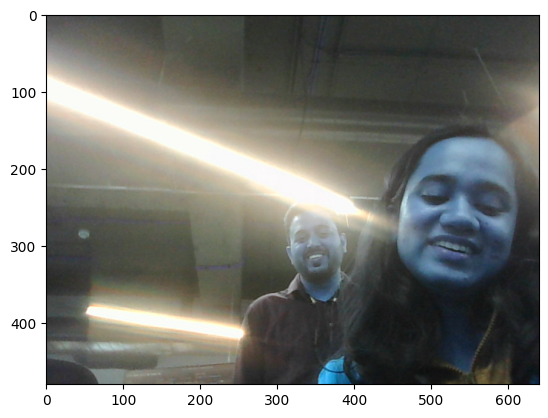

In [5]:
plt.imshow(frame)